In [51]:
import os
import csv

os.chdir(r'C:\My\x2\180421\csv')
mypath = os.getcwd()
print(mypath)

infile_name = '180421_merged.csv'

C:\My\x2\180421\csv


In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv(infile_name, sep=',', header=0)

###### model - poly reg

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['102 <1> (VDC)']].values / 24.9 * 1000 * 1.5 / 2
dataset_y = df[['101 <ITL900> (VDC)']].values / 24.97 * 1000

In [54]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42, shuffle=True)

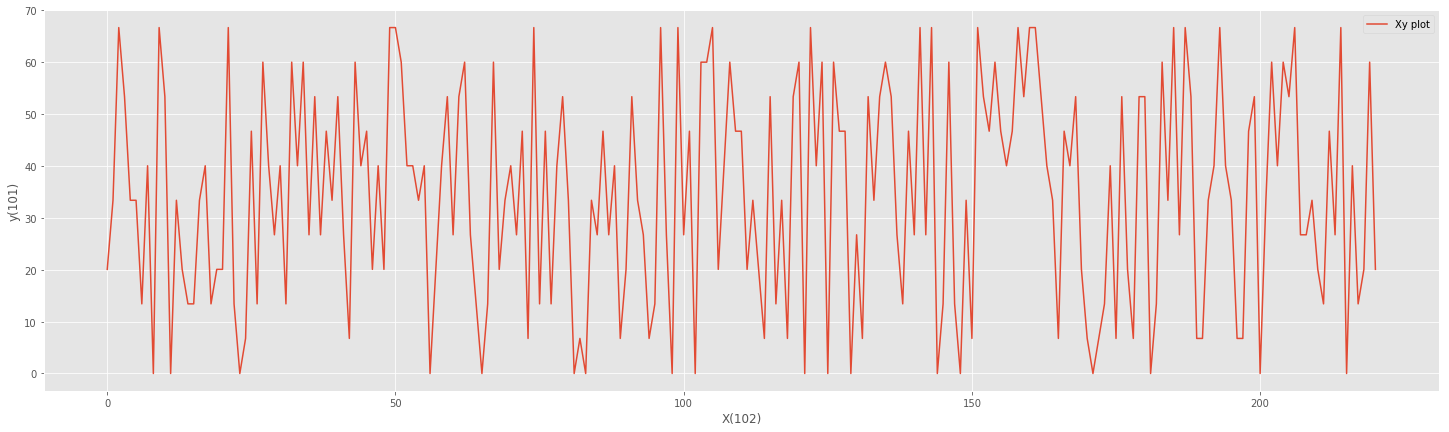

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt_x = range(len(training_set_X[:, 0]))
plt.plot(plt_x, (training_set_y), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=3)
training_set_X_poly_reg = poly.fit_transform(training_set_X)
test_set_X_poly_reg = poly.fit_transform(test_set_X)

model_poly_reg = LinearRegression()
model_poly_reg.fit(training_set_X_poly_reg, training_set_y)
test_set_pred_poly_reg = model_poly_reg.predict(test_set_X_poly_reg)

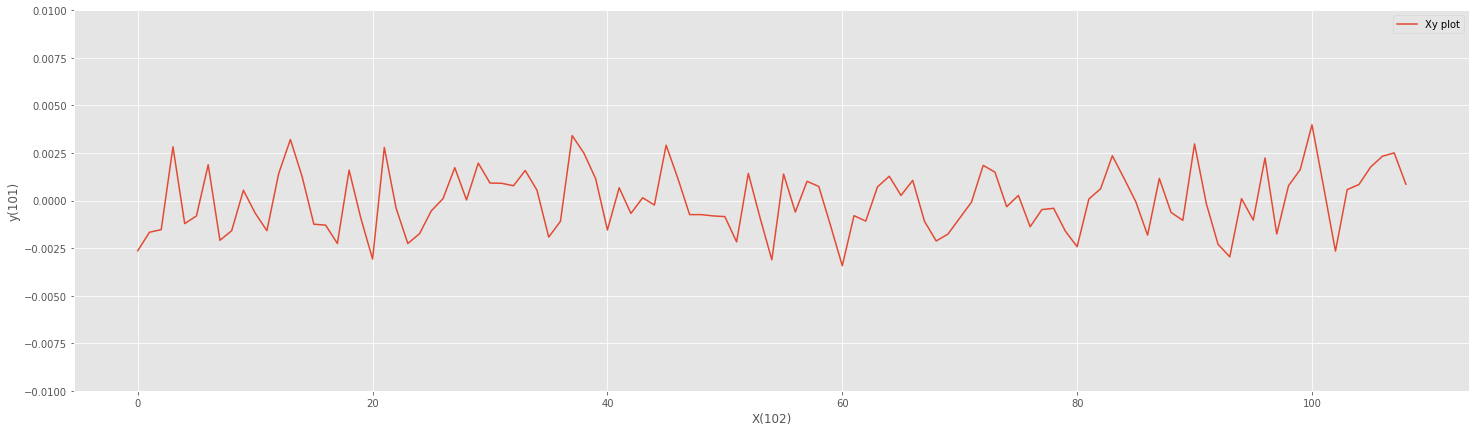

mse: 2.693522468176237e-06  abs max: 0.003981919999302086  abs avg: 0.0013822990458470194


In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt.ylim(ymax=0.01, ymin=-0.01)
plt_x = range(len(test_set_X[:, 0]))
plt.plot(plt_x, (test_set_y - test_set_pred_poly_reg), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


print('mse:', mean_squared_error(test_set_y, test_set_pred_poly_reg),
      ' abs max:', np.max(np.abs(test_set_y - test_set_pred_poly_reg)),
      ' abs avg:', np.average(np.abs(test_set_y - test_set_pred_poly_reg)))